# Part I: Ford GoBike Dataset Exploration
## by Thárcyla Mourão

> Project [Rubric](https://review.udacity.com/#!/rubrics/3592/view)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load dataset
df = pd.read_csv('data/fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### General Information

In [3]:
# get general info on the dataset
print(f"This Ford GoBike dataset has {df.shape[0]} lines and {df.shape[1]} columns", "\n")
df.info()

This Ford GoBike dataset has 183412 lines and 16 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  

#### Drop null values

In [4]:
# drop nulls in place
df.dropna(inplace=True)

In [5]:
# check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Convert `start_station_id`, `end_station_id` and `member_birth_year` from float to int

Since there were some null values in these columns initially, pandas [automatically](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) cast those values to floating-point dtype. 

In [6]:
# list with the columns to convert
int_columns = ['start_station_id', 'end_station_id', 'member_birth_year']

# iterate through the list
for column in int_columns:
    df[column] = df[column].astype(int)

In [7]:
# check to see if it worked
df[['start_station_id', 'end_station_id', 'member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   start_station_id   174952 non-null  int32
 1   end_station_id     174952 non-null  int32
 2   member_birth_year  174952 non-null  int32
dtypes: int32(3)
memory usage: 3.3 MB


#### Convert `user_type` from object to categorical dtype

In [8]:
# check user types available in the dataset
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [9]:
# turn customer into a categorical variable

# list of user types available in the dataset
user_types = ['Customer', 'Subscriber']

# create categorical variable with the list
cat_user_types = pd.api.types.CategoricalDtype(ordered=False, categories=user_types)

# apply categorical variable to the column
df['user_type'] = df['user_type'].astype(cat_user_types)

In [10]:
# check to see if it worked
df['user_type'].unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

#### Convert `member_gender` from object to categorical dtype

In [11]:
# check genders available in the dataset 
df['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [12]:
# turn member_gender into a categorical variable

# list of genders available in the dataset
genders = ['Male', 'Other', 'Female']

# create categorical variable with the list
cat_genders = pd.api.types.CategoricalDtype(ordered=False, categories=genders)

# apply categorical variable to the column
df['member_gender'] = df['member_gender'].astype(cat_genders)

In [13]:
# check to see if it worked
df['member_gender'].unique()

['Male', 'Other', 'Female']
Categories (3, object): ['Male', 'Other', 'Female']

#### Convert `start_time` and `end_time` to datetime

In [14]:
# convert start time and end time to datetime
dates = ['start_time', 'end_time']

for column in dates:
    df[column] = pd.to_datetime(df[column])

In [15]:
# check to see if it worked
df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  174952 non-null  datetime64[ns]
 1   end_time    174952 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


#### Convert `bike_share_for_all_trip` from object to bool

In [16]:
# check which values the column currently has
df['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# create function to make the conversion
def convert_bool(value):
    if value == 'Yes':
        return True
    elif value == 'No':
        return False

df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].apply(convert_bool)

In [18]:
# check to see if it worked
print(df['bike_share_for_all_trip'].unique(), '\n')
df['bike_share_for_all_trip'].info()

[False  True] 

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: bike_share_for_all_trip
Non-Null Count   Dtype
--------------   -----
174952 non-null  bool 
dtypes: bool(1)
memory usage: 1.5 MB


#### Drop columns that won't be used in analysis

In [19]:
# use df.drop to drop the columns that won't be used in analysis
df.drop(['start_station_latitude', 
         'start_station_longitude', 
         'end_station_latitude', 
         'end_station_longitude',
         'bike_id'], axis=1, inplace=True)

In [20]:
# check to see if worked
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False


#### Cleaned dataset

In [21]:
print(f"After cleaning the data, the dataset now has {df.shape[0]} lines and {df.shape[1]} columns", "\n")
df.info()

After cleaning the data, the dataset now has 174952 lines and 11 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int32         
 6   end_station_name         174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_birth_year        174952 non-null  int32         
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  bool          
dtypes: 

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,True
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,False


### What is the structure of your dataset?

The cleaned Ford GoBike dataset has 174,952 lines and 11 columns. Among the columns, we have: 
- `duration_sec`: the duration of the trip in seconds, 
- `start_time`: date and time the trip started, 
- `end_time`: date and time the trip ended, 
- `start_station_id`: id of the station where the trip started,
- `start_station_name`: name of the station where the trip started,
- `start_station_latitude`: latitude of the station where the trip started,
- `start_station_longitude`: longitude of the station where the trip started,
- `end_station_id`: id of the station where the trip ended,
- `end_station_name`: name of the station where the trip ended,
- `end_station_latitude`: latitude of the station where the trip ended,
- `end_station_longitude`: longitude of the station where the trip ended,
- `bike_id`: id of the bike chosen for the trip,
- `user_type`: type of user, which can be either *customer* or *subscriber*,
- `member_birth_year`: user gender,
- `member_gender`: user gender,
- `bike_share_for_all_trip`: discounted [memberships](https://mtc.ca.gov/news/ford-gobike-model-equitable-bike-share-access-us-thanks-community-engagement) for low-income riders

### What is the main feature of interest in your dataset?

The main feature of interest for me is figuring out what factors influence the decision to grab a bike. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Looking at the information available to me, I imagine the features that'll support my investigation are start time, end time, names of the start and end stations, user type, member gender and birth year.

Most likely, there are times during the day with an increase in the number of trips. Also, places that are more crowded (more popular stations) will also see an increase in the number of trips. User type, member gender and birth year will offer additional insight into what those users look like.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [23]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False


#### 1. Univariate: What are the top 10 most common start stations?

In [24]:
base_color = sns.color_palette()[0]

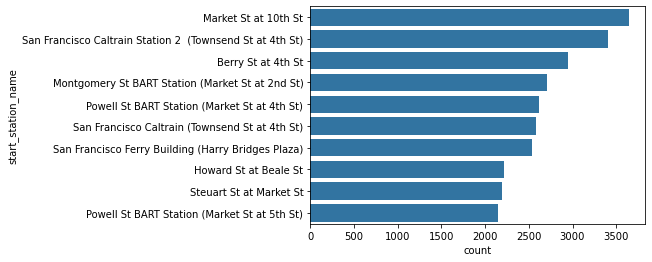

In [25]:
sns.countplot(data=df, y='start_station_name', color=base_color,
             order=df['start_station_name'].value_counts().iloc[:10].index);

**Observations**: Plotting the station names on the y-axis made it easier to interpret it. Now I wonder how much these stations contribute to the whole (their proportion).

#### 1.1. Univariate: What are the top 10 most common start stations, considering their relative frequency?

In [26]:
# get the counts for each start station
start_counts = df['start_station_name'].value_counts()

# get the indexes 
start_index = start_counts.index

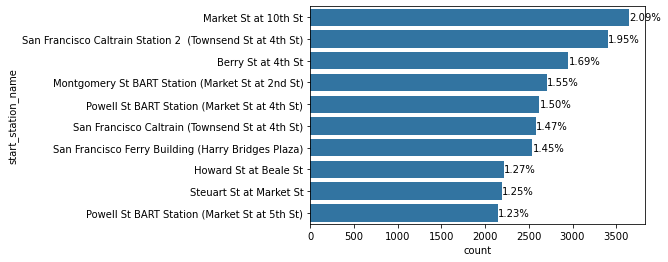

In [27]:
# repeat chart 
sns.countplot(data=df, y='start_station_name', color=base_color, 
              order=df['start_station_name'].value_counts().iloc[:10].index)

# total number of entries in the column
n_stations = df.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(10):
    count = start_counts[i]
    
    pct_string = '{:0.2f}%'.format(100*count/n_stations)
    
    plt.text(count+1, i, pct_string, va='center');

In [28]:
sum_top10 = 0

for i in range(10):
    count = start_counts[i]
    pct = 100*count/n_stations
    sum_top10 += pct

print(f'The top 10 most common start stations represent {sum_top10:.1f}% of all {start_counts.count()} stations.')

The top 10 most common start stations represent 15.4% of all 329 stations.


**Observations**: Now that we've established that the top 10 represent 15% of all 329 stations, it seems worth it to find out whether the most common end stations are similar to the start stations.

#### 2. Univariate: What are the top 10 most common end stations, considering their relative frequency?

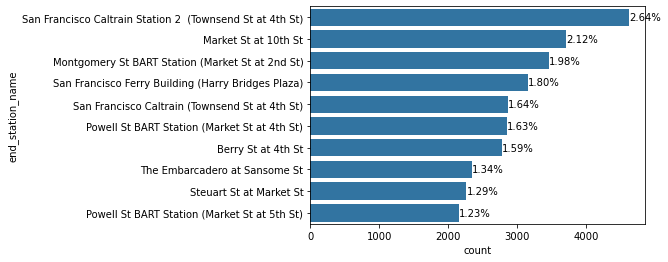

In [29]:
# find total counts for end stations
end_counts = df['end_station_name'].value_counts()

# repeat chart 
sns.countplot(data=df, y='end_station_name', color=base_color, 
              order=df['end_station_name'].value_counts().iloc[:10].index)

# total number of entries in the column
n_stations = df.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(10):
    count = end_counts[i]
    
    pct_string = '{:0.2f}%'.format(100*count/n_stations)
    
    plt.text(count+1, i, pct_string, va='center');

In [30]:
sum_top10 = 0

for i in range(10):
    count = end_counts[i]
    pct = 100*count/n_stations
    sum_top10 += pct

print(f'The top 10 most common start stations represent {sum_top10:.1f}% of all {end_counts.count()} stations.')

The top 10 most common start stations represent 17.3% of all 329 stations.


In [31]:
list1 = df['start_station_name'].value_counts().iloc[:10].index
list2 = df['end_station_name'].value_counts().iloc[:10].index
def intersection(list1, list2):
    list3 = [value for value in list1 if value in list2]
    return list3

In [32]:
len(intersection(list1, list2))

9

**Observations**: The top 10 most common start stations represent 17.3% of all 329 stations. Also, once I start the bivariate analysis, it might be a good idea to plot this intersection between the top 10 most common start and end stations. However, visually assessing both charts separately, they seem to include or less the same stations.

#### 3. Univariate: What is the distribution of trip duration?

In [33]:
# see how the trips are distributed
df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

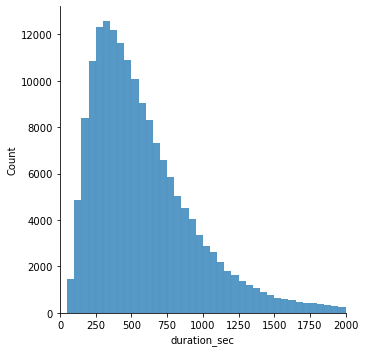

In [34]:
bins = np.arange(0, df['duration_sec'].max()+50, 50)
sns.displot(df['duration_sec'], bins=bins)
plt.xlim((0, 2e3));

**Observations**: Since there is a huge tail, it might be a good idea to use log scale. Also, since 75% of trips had took less than 800 seconds, it might be a good idea to use `plt.xlim()` to remove those outliers as well. 

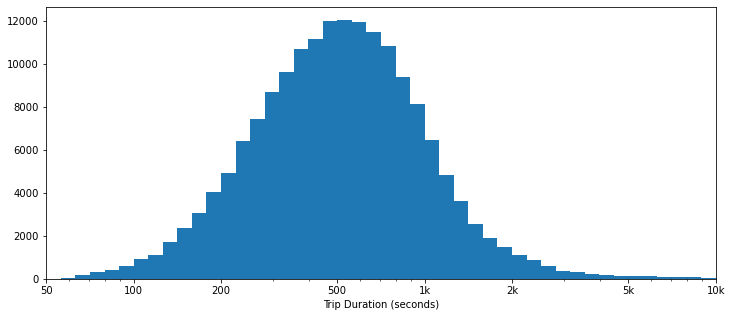

In [35]:
plt.figure(figsize=[12,5])
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([0, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [0, 50, 100, 200, 500, '1k', '2k', '5k', '10k'])
plt.xlim((50, 1e4))
plt.xlabel('Trip Duration (seconds)');

**Observations**: Most trips take between 300 and 1000 seconds, i.e., between 5 and 15 minutes.

#### 4. Univariate: What is the distribution of user types?

([<matplotlib.axis.XTick at 0x2689dedfeb0>], [Text(0, 0, '')])

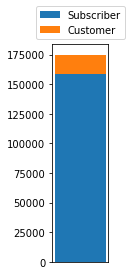

In [36]:
plt.figure(figsize=[1,4])
plt.bar(x=df['user_type'].unique()[0], height=df['user_type'].value_counts()[0], width=0.2)
plt.bar(x=df['user_type'].unique()[0], height=df['user_type'].value_counts()[1], width=0.2, bottom=df['user_type'].value_counts()[0])
plt.legend(['Subscriber', 'Customer'], loc=8, bbox_to_anchor=(0.5, 1))
plt.xticks('')

In [37]:
customer = df[df['user_type'] == "Customer"]['user_type'].count() 
customer_freq = customer / df.shape[0]
customer_freq

0.09468882893593672

In [38]:
subscriber = df[df['user_type'] == "Subscriber"]['user_type'].count() 
subscriber_freq = subscriber / df.shape[0]
subscriber_freq

0.9053111710640633

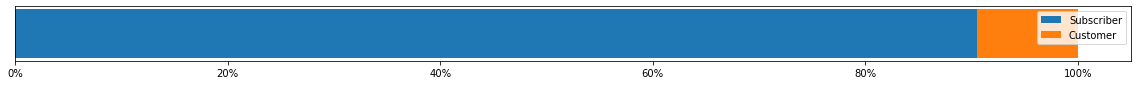

In [39]:
# horizontal bar chart with relative frequency
plt.figure(figsize=[20,1])
plt.barh(y=df['user_type'].unique()[0], width=subscriber_freq)
plt.barh(y=df['user_type'].unique()[0], width=customer_freq, left=subscriber_freq)
plt.legend(['Subscriber', 'Customer'])
plt.yticks('')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));

Note: [this](https://pythonguides.com/stacked-bar-chart-matplotlib/) tutorial helped me include the values on the bars.

Note: [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html) tutorial helped me customize the plot legends.

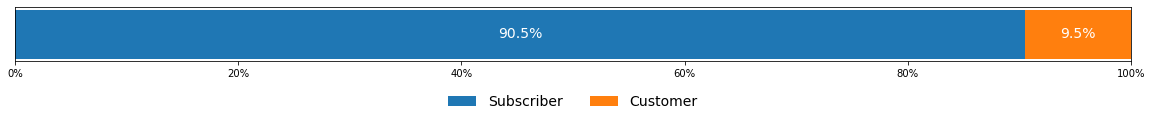

In [40]:
# horizontal bar chart with relative frequency
plt.figure(figsize=[20,1])
plt.barh(y=df['user_type'].unique()[0], width=subscriber_freq)
plt.barh(y=df['user_type'].unique()[0], width=customer_freq, left=subscriber_freq)
plt.legend(['Subscriber', 'Customer'], loc=10, bbox_to_anchor=(0.45, 0.75, 0.1, -3), frameon=False, ncol=2, fontsize=14)
plt.yticks('')
plt.xlim((0, 1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
# plt.axis('off')

for i in plt.gca().patches:
    height = i.get_height()
    width = i.get_width()
    x = i.get_x()
    y = i.get_y()
    label_text = '{:.1f}%'.format(width*100)
    label_x = x + width / 2
    label_y = y + height / 2
    plt.gca().text(label_x, label_y, label_text, ha='center', va='center', fontsize=14, color='white')

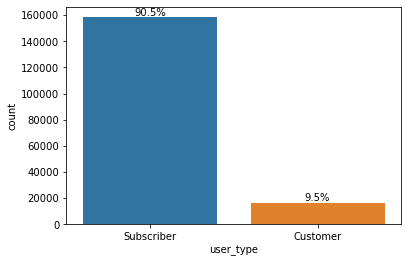

In [41]:
user_counts = df['user_type'].value_counts()

sns.countplot(data=df, x='user_type', order=user_counts.index)

for i in range(user_counts.shape[0]):
    count = user_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i, count+1, pct_string, va='bottom', ha='center');

**Observations**: 9 out of 10 users have a subscription plan. 

In [42]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False


#### 5. Univariate: What is the distribution of user age?

In [43]:
# That 1878 is definitely a typo
df['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

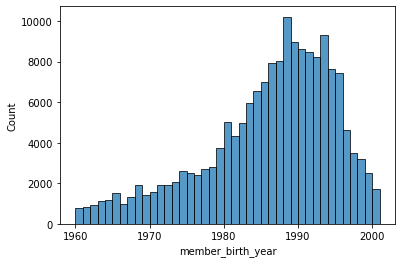

In [44]:
# this chart would be more informative if instead 
# of birth year, I had user age
bins = np.arange(1960, df['member_birth_year'].max()+1, 1)
sns.histplot(data=df, x='member_birth_year', color=base_color, bins=bins);

In [45]:
# create age column based on the year
# of the last recorded trip of this dataset

# finding the year of the last recorded trip: 2019
df['end_time'].sort_values(ascending=False).iloc[:1]

0   2019-03-01 08:01:55.975
Name: end_time, dtype: datetime64[ns]

In [46]:
# find the age users had in 2019 and 
# create a column with this information
df['age'] = 2019 - df['member_birth_year']

In [47]:
# check to see if it worked
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,False,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,False,30


In [48]:
# now that the age column is created,
# check how it's distributed
# this information will inform the chart below
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

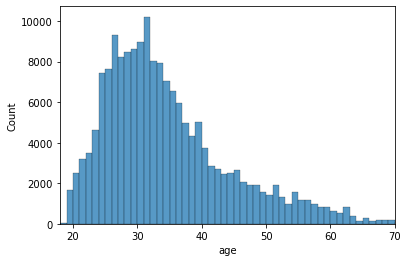

In [49]:
bins = np.arange(0, df['age'].max()+1, 1)
sns.histplot(data=df, x='age', color=base_color, bins=bins)
plt.xlim(18,70);

**Observations**: From the chart we can see that most users are between 18 and 40 years.

#### 6. Univariate: What is the gender distribution?

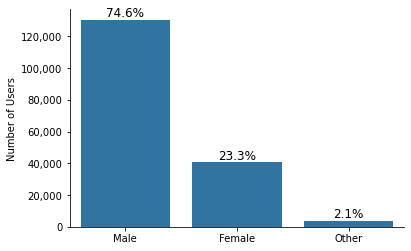

In [50]:
gender_counts = df['member_gender'].value_counts()

sns.countplot(data=df, x='member_gender', order=gender_counts.index, color=base_color)

for i in range(gender_counts.shape[0]):
    count = gender_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i, count+1, pct_string, va='bottom', ha='center', fontsize=12)
    
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('')
plt.ylabel('Number of Users');

**Observations**: 3 out of 4 trips were taken by male users. 

#### 7. Univariate: What is the distribution of the bike share for all program?

In [51]:
bike_share = df['bike_share_for_all_trip'].value_counts()
bike_share

False    157606
True      17346
Name: bike_share_for_all_trip, dtype: int64

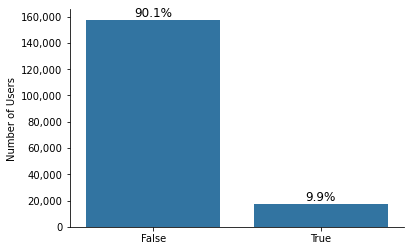

In [52]:
sns.countplot(data=df, x='bike_share_for_all_trip', color=base_color);

ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('')
plt.ylabel('Number of Users');

for i in range(bike_share.shape[0]):
    count = bike_share[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i, count+1, pct_string, va='bottom', ha='center', fontsize=12)

**Observations**: Only 1 out of 10 trips are discounted ones, part of the Bike Share for All program.

In [53]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False,35


#### 8. Univariate: What is the distribution of start times of trips?

> try to make a chart showing the frequency of trips by hour

In [54]:
# first, separate the date from the dates
df['start_hour'] = [d.time() for d in df['start_time']]

In [55]:
# check to see if it worked
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False,35,17:32:10.145000




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

